In [53]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [54]:
def load_coerece(experiment):
    folder = f"results/coerence_{experiment}"
    t = np.load(os.path.join(folder, "t.npy"))
    if experiment in ['linear1', 'linear2', 'linear3', 'linear4', 'linear5', 'linear6','exp1', 'exp2', 'exp3', 'exp4', 'exp5', 'exp6']:
        list = np.load(os.path.join(folder, "w_list.npy"))
    elif experiment in ['gauss1', 'gauss2', 'gauss4','gauss5']:
        list = np.load(os.path.join(folder, "ep_list.npy")) 
    elif experiment in ['gauss3','gauss6']:
        list = np.load(os.path.join(folder, "T_list.npy")) 
    var_aberto = np.load(os.path.join(folder, "var_aberto.npy"), allow_pickle=True)
    const_aberto = np.load(os.path.join(folder, "const_aberto.npy"), allow_pickle=True)
    C_wt = np.vstack([np.asarray(row, dtype=np.complex128).ravel() for row in var_aberto])
    C_wt = np.real(C_wt)  # coherence should be real; keep real part safely

    const_aberto = np.asarray(const_aberto, dtype=np.complex128).ravel()
    const_aberto = np.real(const_aberto)

    # Difference: var_aberto(w,t) - const_aberto(t)
    D_wt = C_wt - const_aberto[None, :]
    return list, C_wt, D_wt, const_aberto, t

def plot_coherence_and_difference(
    t,
    list,
    C_wt,
    D_wt,
    #title_var="Variável",
    #title_diff="Diferença",
    cmap_var=None,
    cmap_diff=None,
    experiment="linear1"
):
    """
    Plota:
    1) Heatmap de C(w,t)
    2) Heatmap de D(w,t)

    Parameters
    ----------
    t : array
        Vetor de tempo
    w_list : array
        Frequências (omega)
    C_wt : 2D array
        Coerência C(w,t)
    D_wt : 2D array
        Diferença D(w,t)
    title_var : str
        Título do primeiro gráfico
    title_diff : str
        Título do segundo gráfico
    cmap_var : str or None
        Colormap do primeiro heatmap
    cmap_diff : str or None
        Colormap do segundo heatmap
    """

    # ==========================
    # Plot 1: Coerência
    # ==========================
    plt.figure()
    plt.imshow(
        C_wt,
        aspect="auto",
        origin="lower",
        extent=[t[0], t[-1], list[0], list[-1]],
        cmap=cmap_var
    )
    plt.xlabel("$t$",fontsize=20)
    if experiment in ['linear1', 'linear2', 'linear3', 'linear4', 'linear5', 'linear6','exp1', 'exp2', 'exp3', 'exp4', 'exp5', 'exp6']:
        plt.ylabel(r"$\omega$",fontsize=20)
    elif experiment in ['gauss1', 'gauss2', 'gauss4', 'gauss5']:
        plt.ylabel(r"$\zeta$",fontsize=20)
    elif experiment in ['gauss3','gauss6']:
        plt.ylabel(r"$T$",fontsize=20)
    #plt.title(title_var)
    plt.colorbar(label=r"$C(\rho^{(Q)})$")
    plt.tight_layout()
    plt.show()

    # ==========================
    # Plot 2: Diferença
    # ==========================
    plt.figure()
    plt.imshow(
        D_wt,
        aspect="auto",
        origin="lower",
        extent=[t[0], t[-1], list[0], list[-1]],
        cmap=cmap_diff
    )
    plt.xlabel("t",fontsize=20)
    if experiment in ['linear1', 'linear2', 'linear3', 'linear4', 'linear5', 'linear6','exp1', 'exp2', 'exp3', 'exp4', 'exp5', 'exp6']:
        plt.ylabel(r"$\omega$", fontsize=20)
    elif experiment in ['gauss1', 'gauss2', 'gauss4', 'gauss5']:
        plt.ylabel(r"$\zeta$", fontsize=20)
    elif experiment in ['gauss3','gauss6']:
        plt.ylabel(r"$T$", fontsize=20)
    #plt.title(title_diff)
    plt.colorbar(label=r"$\Delta C(\rho^{(Q)})$")
    plt.tight_layout()
    plt.show()

def plot_selected_coherences(
t,
const,
C_wt,
list,
indices,
scale_factor=1e-3,
#title="Comparação selecionada",
yscale="log"
):
    """
    Plota g0 e curvas g_t selecionadas de C(w,t).

    Parameters
    ----------
    t : array
        Vetor de tempo
    const : array
        Curva constante g0(t)
    C_wt : 2D array
        Coerência C(w,t)
    w_list : array
        Frequências (omega)
    indices : list or tuple
        Índices de w a serem plotados (ex: [1, 93, -1])
    scale_factor : float
        Fator usado no cálculo de d = w^2 / scale_factor
    title : str
        Título do gráfico
    yscale : str
        Escala do eixo y ("log" ou "linear")
    """

    plt.figure()

    # curva constante
    plt.plot(t, const, label=r"$g_0$")

    # curvas selecionadas
    for i in indices:
        d_val = list[i]**2 / scale_factor
        label = rf"$g_t$ with $d={d_val:.5g}$"
        plt.plot(t, C_wt[i], label=label)

    plt.yscale(yscale)
    plt.xlabel("$t$", fontsize=20)
    plt.ylabel(r"$C(\rho^{Q})$")
    #plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



# 0. Parâmetros gerais



# 1. Exponenciais

Vamos considerar a modulação do tipo exponencial,

\begin{equation}
    g(t) = g_0 \exp(\omega t + \phi),
\end{equation}
mas modificando os tais parâmetros para compreender diferentes cenários físicos.

## 1.1 - Aumento exponencial começando de $g(0)\ll 1$
Aqui, vamos verificar tal comportamento fazendo $\phi=\ln(10^{-3})$ e $0<\omega<\frac{\ln(2)-\ln(10^{-3})}{T}$.


### 1.1.1 - $T$ grande o suficiente para cessar a dinâmica
Queremos verificar o corpotamento quando o sistema sofre grandes perdas. Para isso, utilizaremos $T=150$. Na figura abaixo, pode-se ver o comportamento do acoplamento.

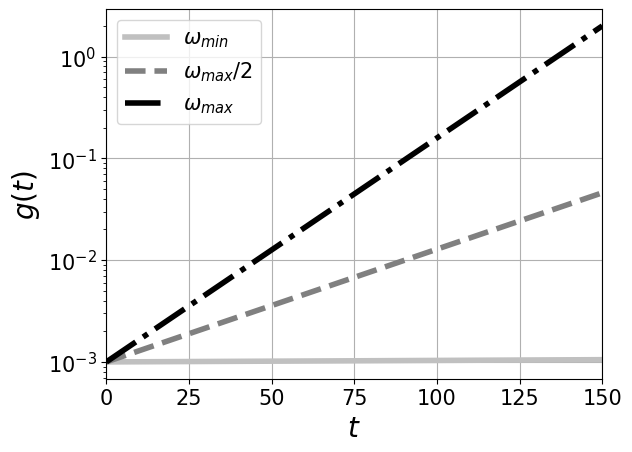

In [55]:
w_list, C_wt, D_wt, const, t = load_coerece('exp1')

lw_list = ['-', '--', '-.']
c_list = ['silver', 'gray','black']
indices = [1, len(w_list)//2, -1]

w_label = ['$\omega_{min}$','$\omega_{max}$/2','$\omega_{max}$']

for i, idx in enumerate(indices):
    g = np.exp(w_list[idx]*t + np.log(1e-3))
    plt.plot(t, g, lw=4, ls=lw_list[i], color=c_list[i], label=w_label[i])


plt.legend(fontsize=15)
plt.ylabel('$g(t)$', fontsize=20)
plt.xlabel('$t$', fontsize=20)
plt.yscale('log')
plt.yticks(fontsize=15)
plt.xticks([0, 25, 50, 75, 100, 125, 150], fontsize=15)
plt.xlim(0, 150)
plt.grid(True)
plt.show()

As simulações para esses parâmetros são apresentadas abaixo, assim como a diferença entre os resultados para $g(t)$ e $g_0$, durante todo o intervalo de tempo.

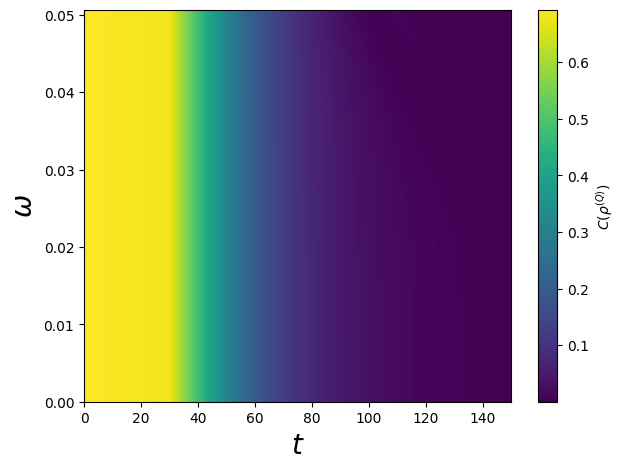

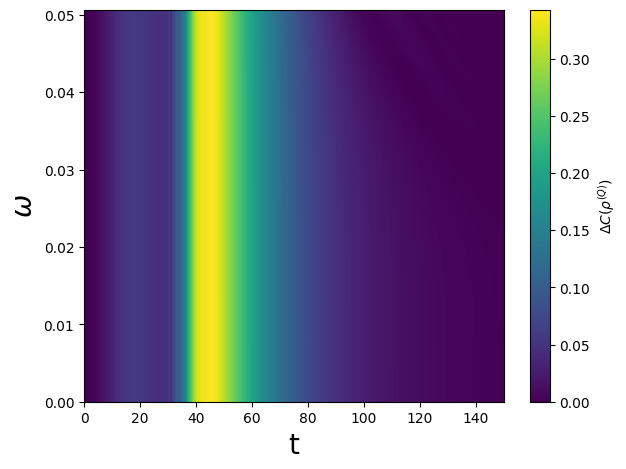

In [56]:
plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt
)

Para uma melhor comparação, olhamos para os três valores de acoplhamento vistos na primeira figura.

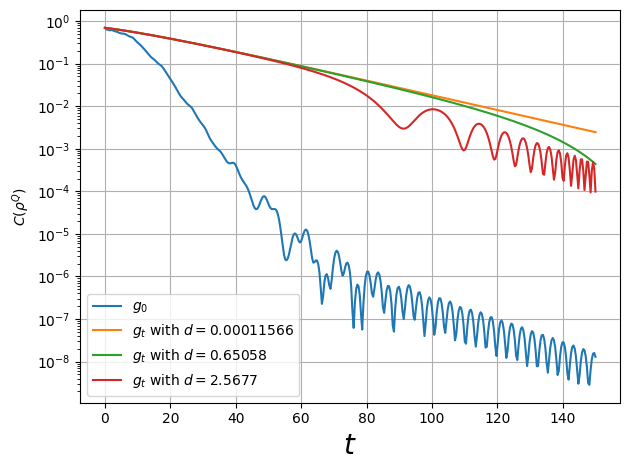

In [57]:
plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices
)

### 1.1.2 - $T$ menor, sem cessar a dinâmica
Queremos verificar o corpotamento quando o sistema não sofre grandes perdas. Para isso, utilizaremos $T=50$. Na figura abaixo, pode-se ver o comportamento do acoplamento.

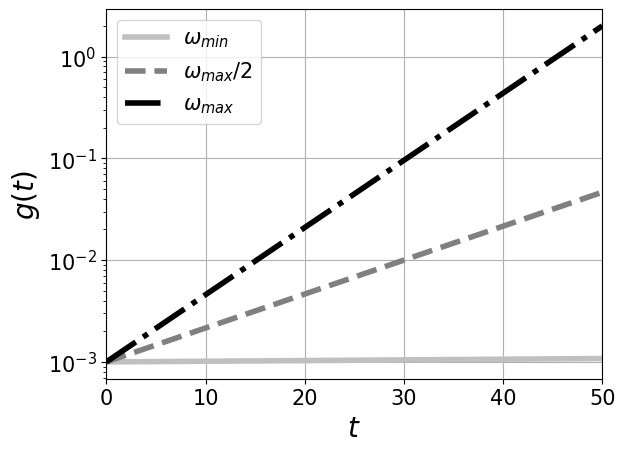

In [58]:
w_list, C_wt, D_wt, const, t = load_coerece('exp4')

lw_list = ['-', '--', '-.']
c_list = ['silver', 'gray','black']
indices = [1, len(w_list)//2, -1]

w_label = ['$\omega_{min}$','$\omega_{max}$/2','$\omega_{max}$']

for i, idx in enumerate(indices):
    g = np.exp(w_list[idx]*t + np.log(1e-3))
    plt.plot(t, g, lw=4, ls=lw_list[i], color=c_list[i], label=w_label[i])


plt.legend(fontsize=15)
plt.ylabel('$g(t)$', fontsize=20)
plt.xlabel('$t$', fontsize=20)
plt.yscale('log')
plt.yticks(fontsize=15)
plt.xticks([0, 10, 20, 30, 40, 50], fontsize=15)
plt.xlim(0, 50)
plt.grid(True)
plt.show()

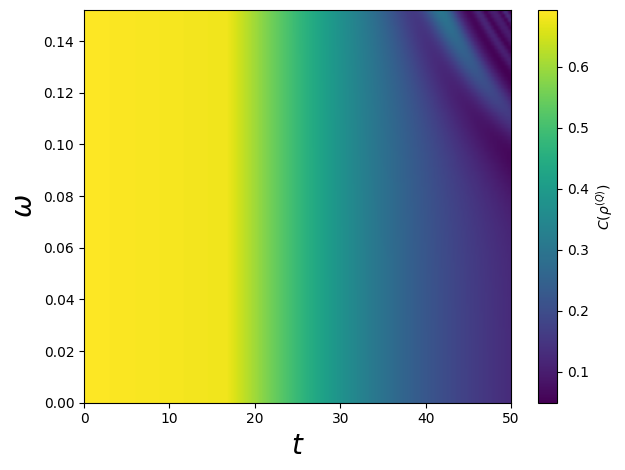

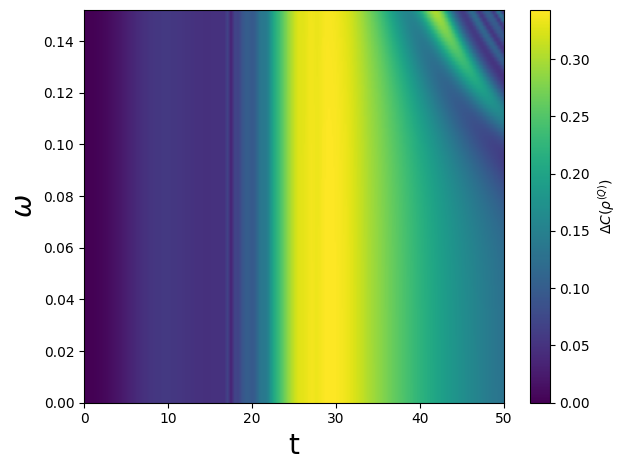

In [59]:
plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt
)

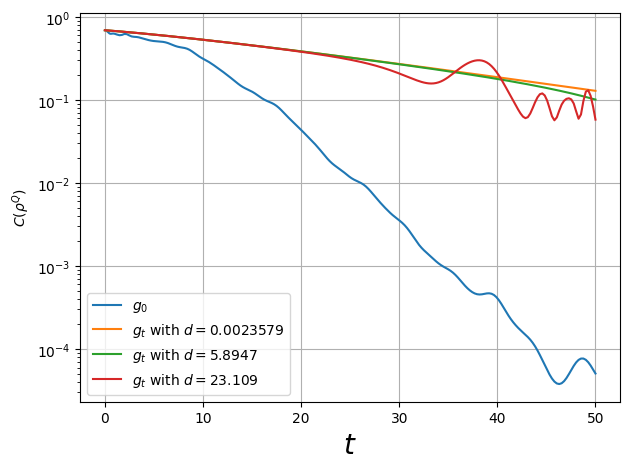

In [60]:
indices = [1, len(w_list)//2, -1]

plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices
)

## 1.2 - Diminuição exponencial começando de $g(0)= 1$
Aqui, vamos verificar tal comportamento fazendo $\phi=0$ e $\frac{\ln(10^{-3})}{T}<\omega<0$.

### 1.2.1 - $T$ grande o suficiente para cessar a dinâmica
$T=150$

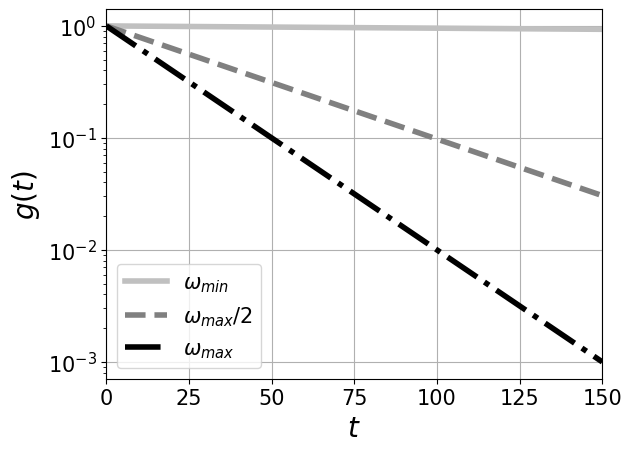

In [61]:
w_list, C_wt, D_wt, const, t = load_coerece('exp2')

lw_list = ['-', '--', '-.']
c_list = ['silver', 'gray','black']
indices = [1, len(w_list)//2, -1]

w_label = ['$\omega_{min}$','$\omega_{max}$/2','$\omega_{max}$']

for i, idx in enumerate(indices):
    g = np.exp(w_list[idx]*t )
    plt.plot(t, g, lw=4, ls=lw_list[i], color=c_list[i], label=w_label[i])


plt.legend(fontsize=15)
plt.ylabel('$g(t)$', fontsize=20)
plt.xlabel('$t$', fontsize=20)
plt.yscale('log')
plt.yticks(fontsize=15)
plt.xticks([0, 25, 50, 75, 100, 125, 150], fontsize=15)
plt.xlim(0, 150)
plt.grid(True)
plt.show()

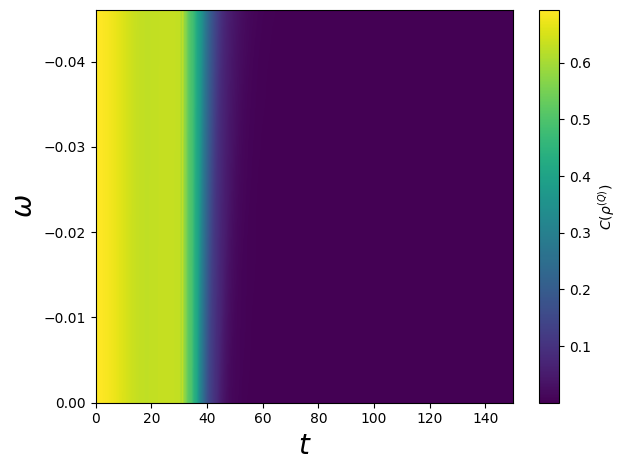

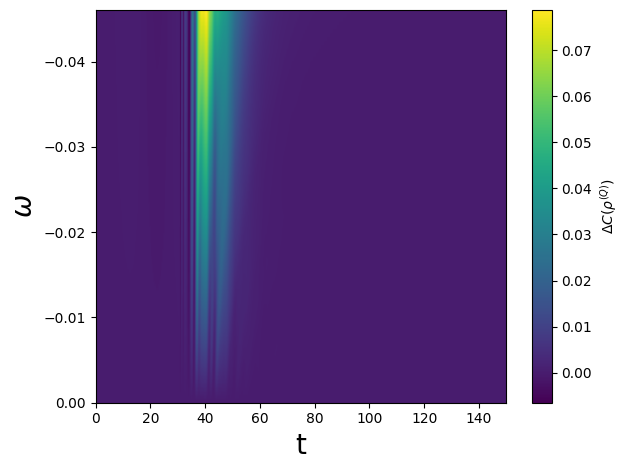

In [62]:
plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt
)

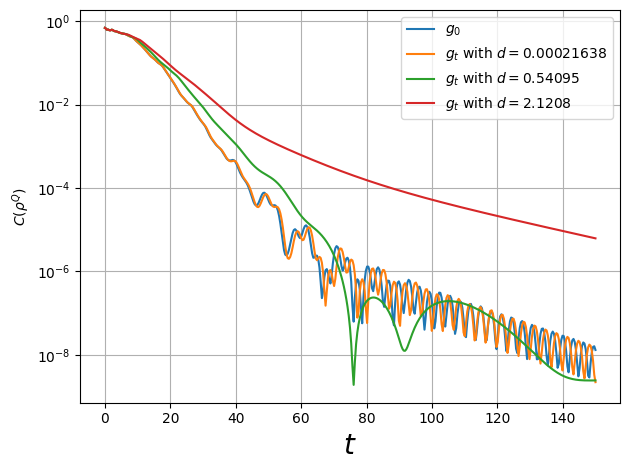

In [63]:
indices = [1, len(w_list)//2, -1]

plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices
)

### 1.2.2 - $T$ menor, sem cessar a dinâmica
Queremos verificar o corpotamento quando o sistema não sofre grandes perdas. Para isso, utilizaremos $T=50$. Na figura abaixo, pode-se ver o comportamento do acoplamento.

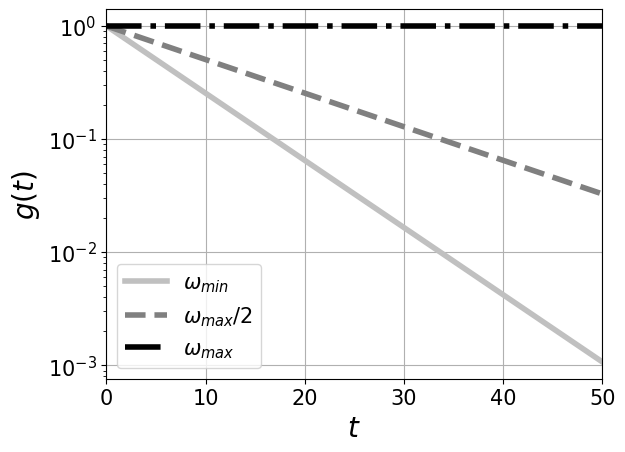

In [64]:
w_list, C_wt, D_wt, const, t = load_coerece('exp5')

lw_list = ['-', '--', '-.']
c_list = ['silver', 'gray','black']
indices = [1, len(w_list)//2, -1]

w_label = ['$\omega_{min}$','$\omega_{max}$/2','$\omega_{max}$']

for i, idx in enumerate(indices):
    g = np.exp(w_list[idx]*t)
    plt.plot(t, g, lw=4, ls=lw_list[i], color=c_list[i], label=w_label[i])


plt.legend(fontsize=15)
plt.ylabel('$g(t)$', fontsize=20)
plt.xlabel('$t$', fontsize=20)
plt.yscale('log')
plt.yticks(fontsize=15)
plt.xticks([0, 10, 20, 30, 40, 50], fontsize=15) #[0, 25, 50, 75, 100, 125, 150]
plt.xlim(0, 50)
plt.grid(True)
plt.show()

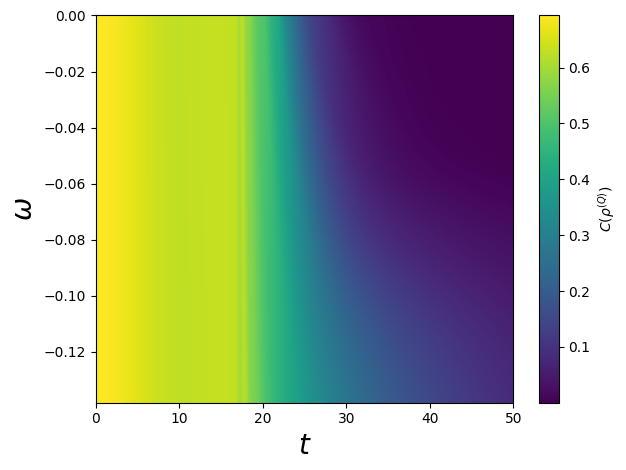

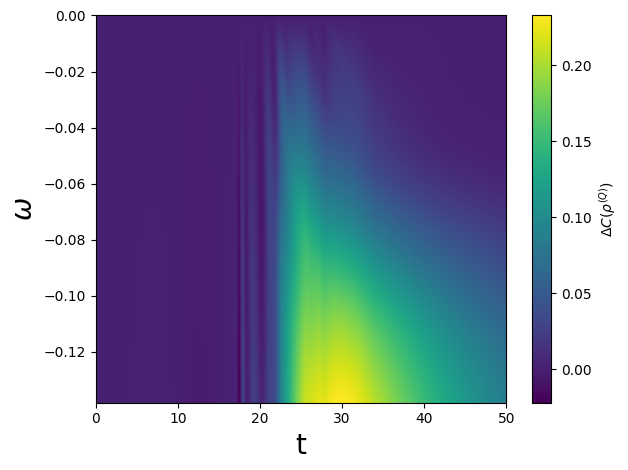

In [65]:
w_list, C_wt, D_wt, const, t = load_coerece('exp5')

plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt
)

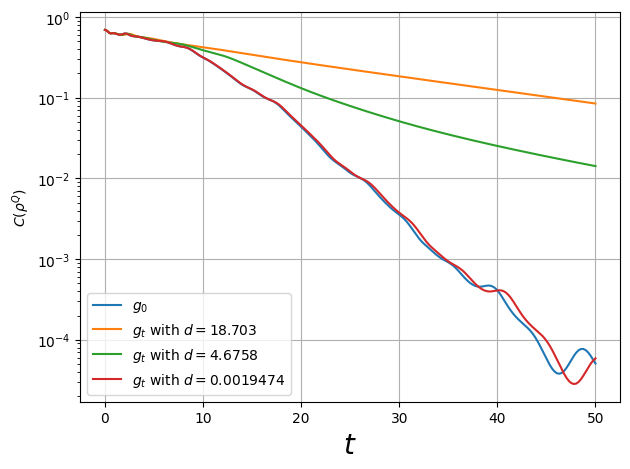

In [66]:
indices = [1, len(w_list)//2, -2]

plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices
)

## 1.3 Aumento exponencial suave de um acoplamento começando em $g(0)=1$
Aqui, vamos verifical tal comportamento fazendo $\phi=0$ e $0 < \omega \frac{\ln(2)}{T}$.

### 1.3.1 - $T$ grande o suficiente para cessar a dinâmica
$T=150$

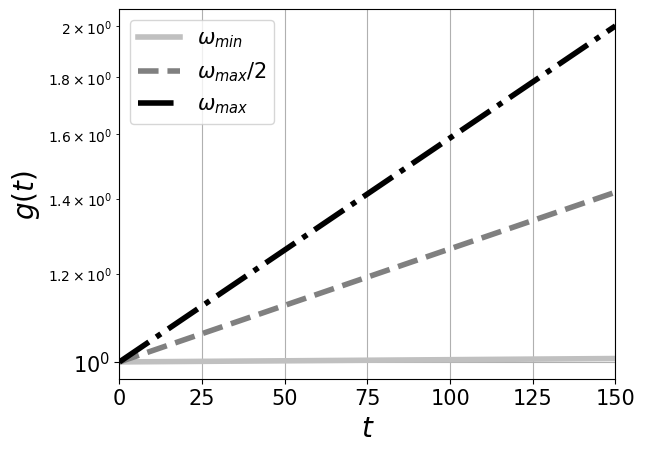

In [67]:
w_list, C_wt, D_wt, const, t = load_coerece('exp3')

lw_list = ['-', '--', '-.']
c_list = ['silver', 'gray','black']
indices = [1, len(w_list)//2, -1]

w_label = ['$\omega_{min}$','$\omega_{max}$/2','$\omega_{max}$']

for i, idx in enumerate(indices):
    g = np.exp(w_list[idx]*t )
    plt.plot(t, g, lw=4, ls=lw_list[i], color=c_list[i], label=w_label[i])

plt.legend(fontsize=15)
plt.ylabel('$g(t)$', fontsize=20)
plt.xlabel('$t$', fontsize=20)
plt.yscale('log')
plt.yticks(fontsize=15)
plt.xticks([0, 25, 50, 75, 100, 125, 150], fontsize=15)
plt.xlim(0, 150)
plt.grid(True)
plt.show()

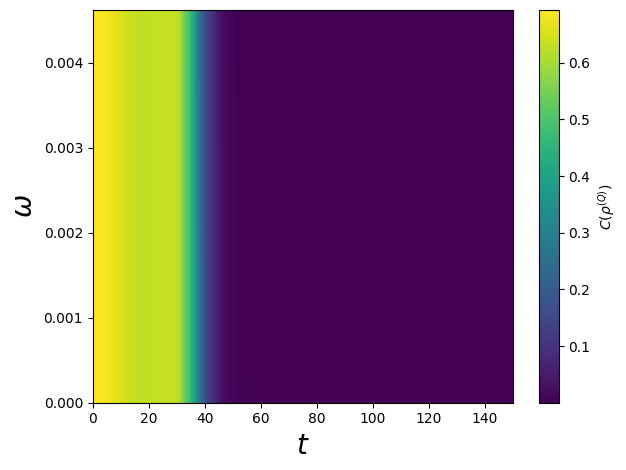

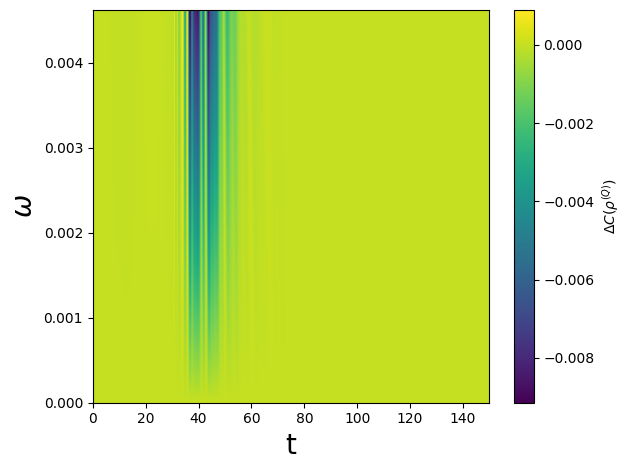

In [68]:
plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt
)

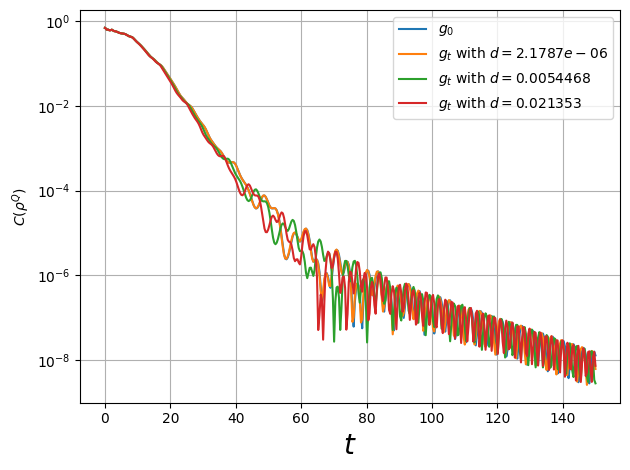

In [69]:
# Aqui aquele d não se aplica, pq sempre é muito menor omega do que os decaimentos
indices = [1, len(w_list)//2, -1]

plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices
)

### 1.2.2 - $T$ menor, sem cessar a dinâmica
Queremos verificar o corpotamento quando o sistema não sofre grandes perdas. Para isso, utilizaremos $T=50$. Na figura abaixo, pode-se ver o comportamento do acoplamento.

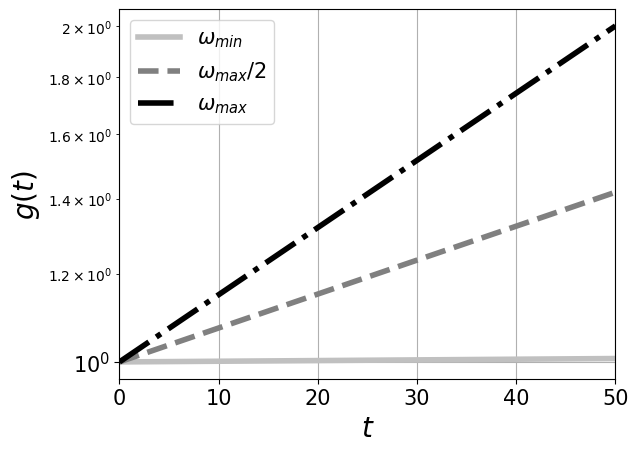

In [70]:
w_list, C_wt, D_wt, const, t = load_coerece('exp6')

lw_list = ['-', '--', '-.']
c_list = ['silver', 'gray','black']
indices = [1, len(w_list)//2, -1]

w_label = ['$\omega_{min}$','$\omega_{max}$/2','$\omega_{max}$']

for i, idx in enumerate(indices):
    g = np.exp(w_list[idx]*t )
    plt.plot(t, g, lw=4, ls=lw_list[i], color=c_list[i], label=w_label[i])


plt.legend(fontsize=15)
plt.ylabel('$g(t)$', fontsize=20)
plt.xlabel('$t$', fontsize=20)
plt.yscale('log')
plt.yticks(fontsize=15)
plt.xticks([0,10, 20, 30, 40, 50], fontsize=15)
plt.xlim(0, 50)
plt.grid(True)
plt.show()

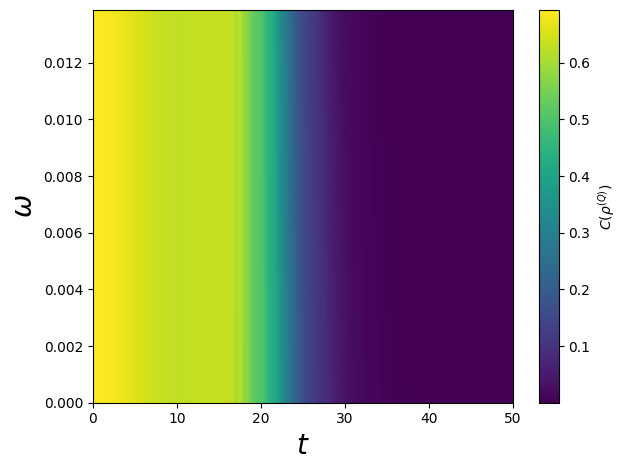

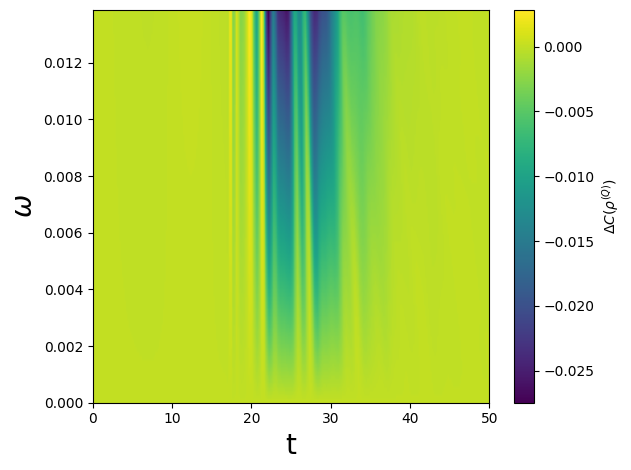

In [71]:
w_list, C_wt, D_wt, const, t = load_coerece('exp6')

plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt
)

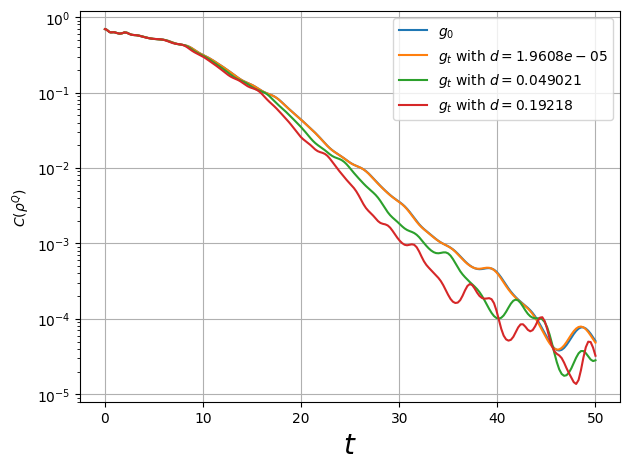

In [72]:
# Aqui aquele d não se aplica, pq sempre é muito menor omega do que os decaimentos
indices = [1, len(w_list)//2, -1]

plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices
)


# 2. Linear

Vamos considerar a modulação do tipo exponencial,

\begin{equation}
    g(t) = g_0 (\omega t + \phi),
\end{equation}
mas modificando os tais parâmetros para compreender diferentes cenários físicos.

## 2.1 Mudança Adiabática e Mudança Abrupta
Aqui, vamos verifical tal comportamento fazendo $\phi=0$ e $0 < \omega < 0.2$.

### 2.1.1 - $T$ grande
$T=150$

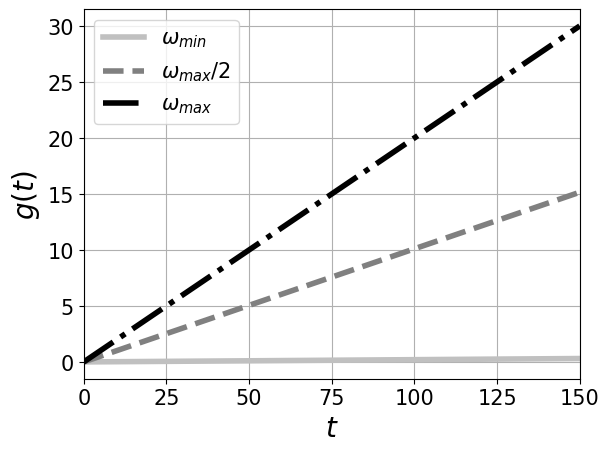

In [73]:
w_list, C_wt, D_wt, const, t = load_coerece('linear1')

lw_list = ['-', '--', '-.']
c_list = ['silver', 'gray','black']
indices = [1, len(w_list)//2, -1]

w_label = ['$\omega_{min}$','$\omega_{max}$/2','$\omega_{max}$']

for i, idx in enumerate(indices):
    g = w_list[idx]*t + 0
    plt.plot(t, g, lw=4, ls=lw_list[i], color=c_list[i], label=w_label[i])

plt.legend(fontsize=15)
plt.ylabel('$g(t)$', fontsize=20)
plt.xlabel('$t$', fontsize=20)
#plt.yscale('log')
plt.yticks(fontsize=15)
plt.xticks([0, 25, 50, 75, 100, 125, 150], fontsize=15)
plt.xlim(0, 150)
plt.grid(True)
plt.show()

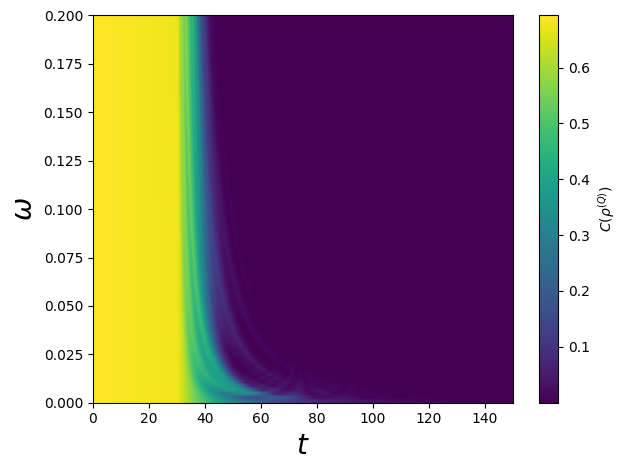

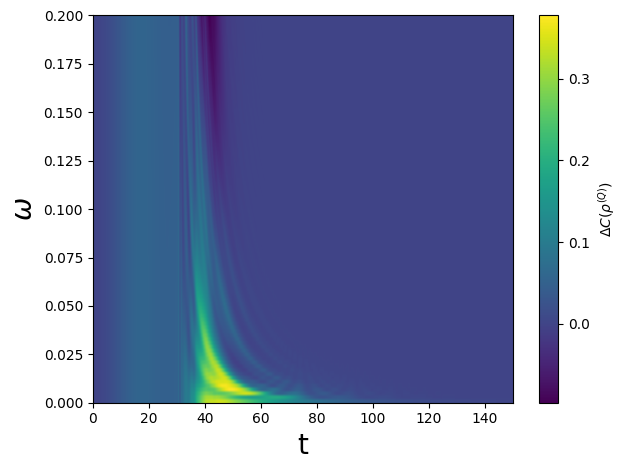

In [74]:
plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt
)

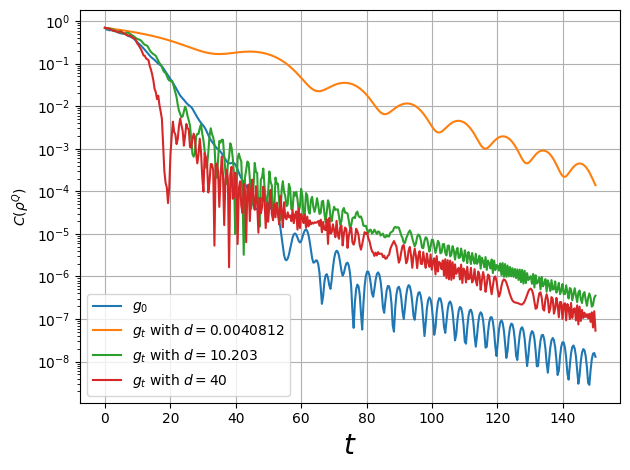

In [75]:
plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices
)


### 2.1.2 - $T$ pequeno
$T=50$

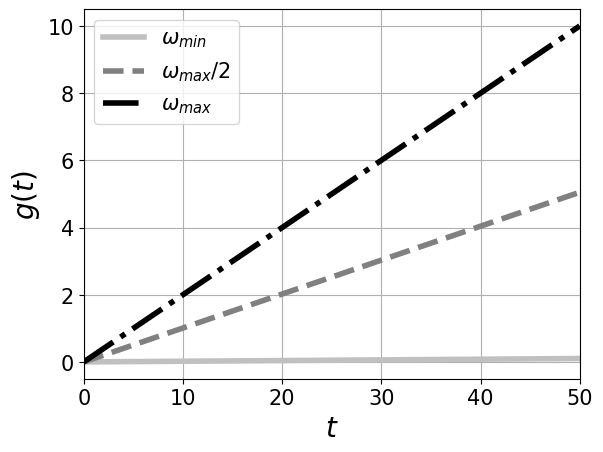

In [76]:
w_list, C_wt, D_wt, const, t = load_coerece('linear4')

lw_list = ['-', '--', '-.']
c_list = ['silver', 'gray','black']
indices = [1, len(w_list)//2, -1]

w_label = ['$\omega_{min}$','$\omega_{max}$/2','$\omega_{max}$']

for i, idx in enumerate(indices):
    g = w_list[idx]*t + 0
    plt.plot(t, g, lw=4, ls=lw_list[i], color=c_list[i], label=w_label[i])

plt.legend(fontsize=15)
plt.ylabel('$g(t)$', fontsize=20)
plt.xlabel('$t$', fontsize=20)
#plt.yscale('log')
plt.yticks(fontsize=15)
plt.xticks([0, 10, 20, 30, 40, 50], fontsize=15)
plt.xlim(0, 50)
plt.grid(True)
plt.show()

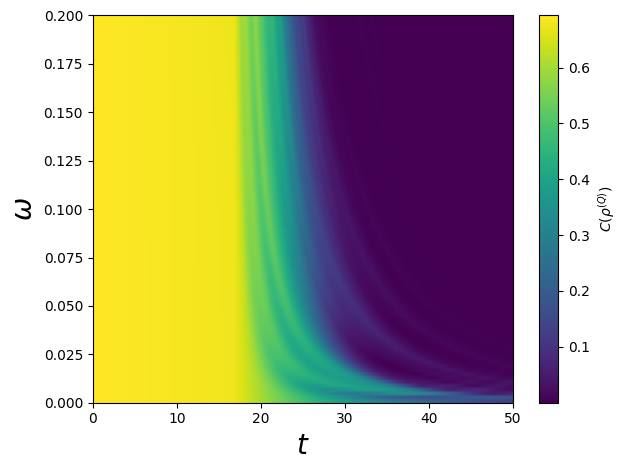

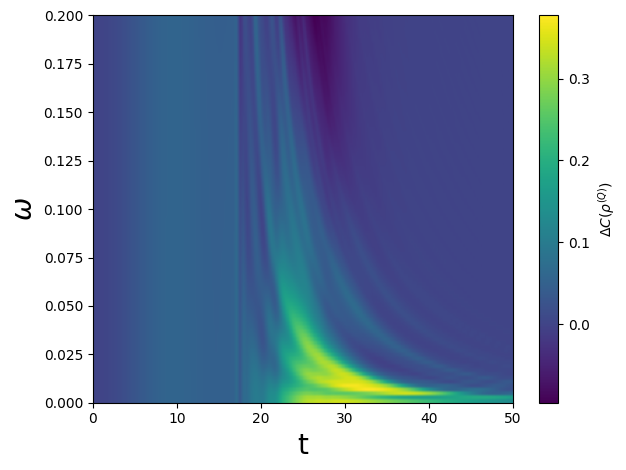

In [77]:
plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt
)

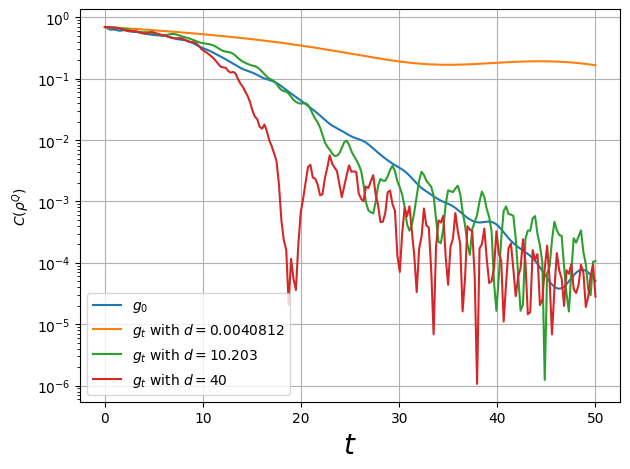

In [78]:
plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices
)


## 2.2 Decaimento até 0
Aqui, vamos verifical tal comportamento fazendo $\phi=1$ e $-\frac{1}{T} < \omega < 0$.

### 2.2.1 - $T$ grande
$T=150$

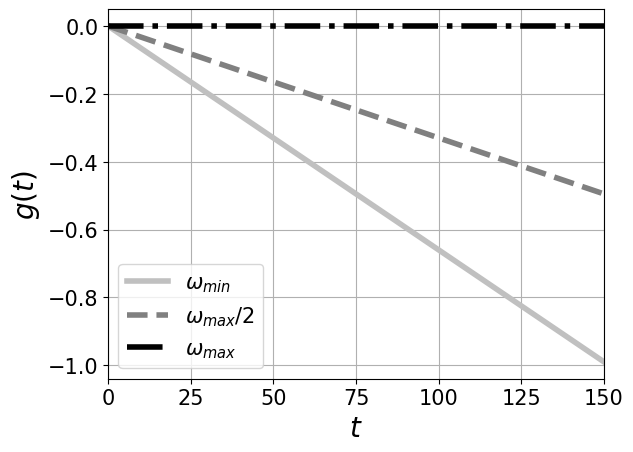

In [79]:
w_list, C_wt, D_wt, const, t = load_coerece('linear2')

lw_list = ['-', '--', '-.']
c_list = ['silver', 'gray','black']
indices = [1, len(w_list)//2, -1]

w_label = ['$\omega_{min}$','$\omega_{max}$/2','$\omega_{max}$']

for i, idx in enumerate(indices):
    g = w_list[idx]*t + 0
    plt.plot(t, g, lw=4, ls=lw_list[i], color=c_list[i], label=w_label[i])

plt.legend(fontsize=15)
plt.ylabel('$g(t)$', fontsize=20)
plt.xlabel('$t$', fontsize=20)
#plt.yscale('log')
plt.yticks(fontsize=15)
plt.xticks([0, 25, 50, 75, 100, 125, 150], fontsize=15)
plt.xlim(0, 150)
plt.grid(True)
plt.show()

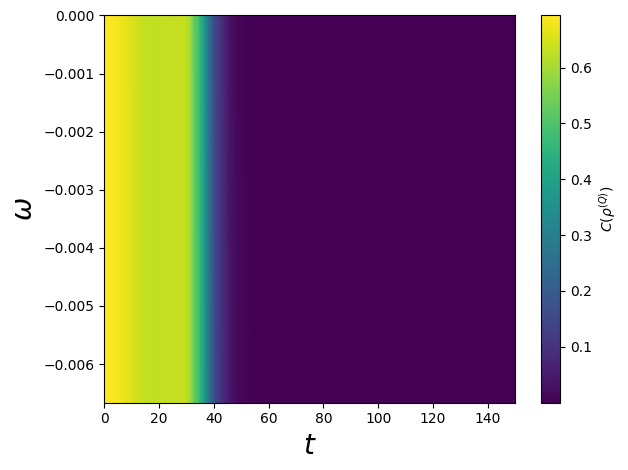

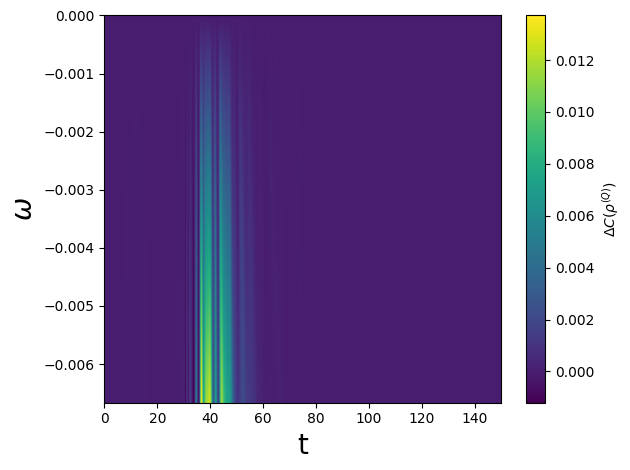

In [80]:
plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt
)

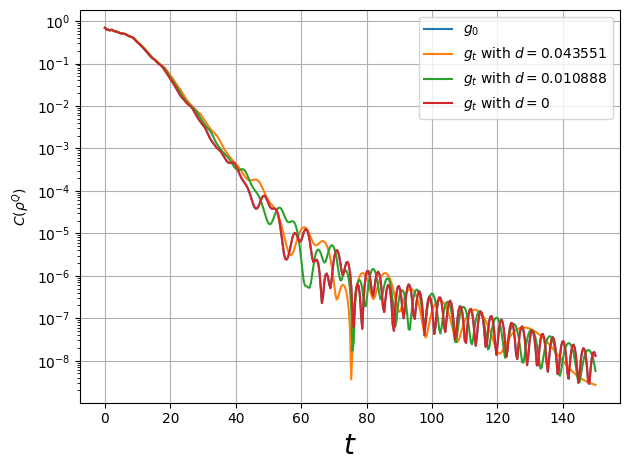

In [81]:
# Aqui aquele d não se aplica, pq sempre é muito menor omega do que os decaimentos
plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices
)


### 2.2.2 - $T$ pequeno
$T=50$

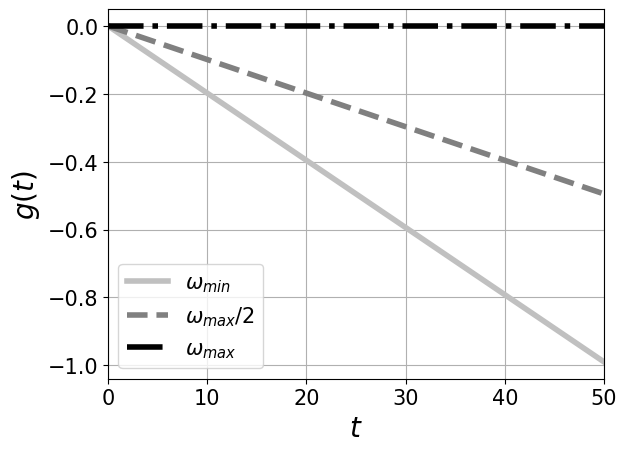

In [82]:
w_list, C_wt, D_wt, const, t = load_coerece('linear5')

lw_list = ['-', '--', '-.']
c_list = ['silver', 'gray','black']
indices = [1, len(w_list)//2, -1]

w_label = ['$\omega_{min}$','$\omega_{max}$/2','$\omega_{max}$']

for i, idx in enumerate(indices):
    g = w_list[idx]*t + 0
    plt.plot(t, g, lw=4, ls=lw_list[i], color=c_list[i], label=w_label[i])

plt.legend(fontsize=15)
plt.ylabel('$g(t)$', fontsize=20)
plt.xlabel('$t$', fontsize=20)
#plt.yscale('log')
plt.yticks(fontsize=15)
plt.xticks([0, 10, 20, 30, 40, 50], fontsize=15)
plt.xlim(0, 50)
plt.grid(True)
plt.show()

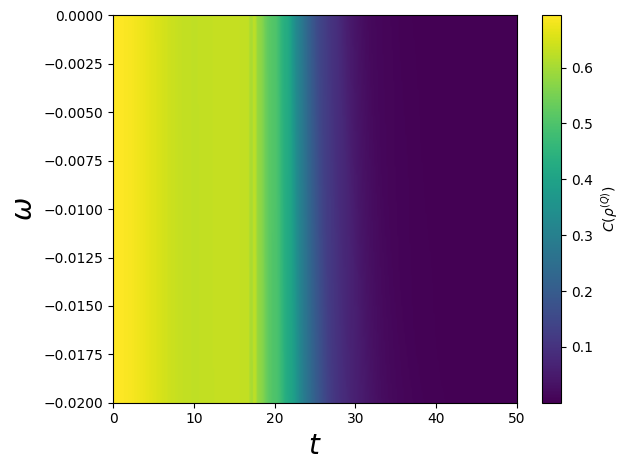

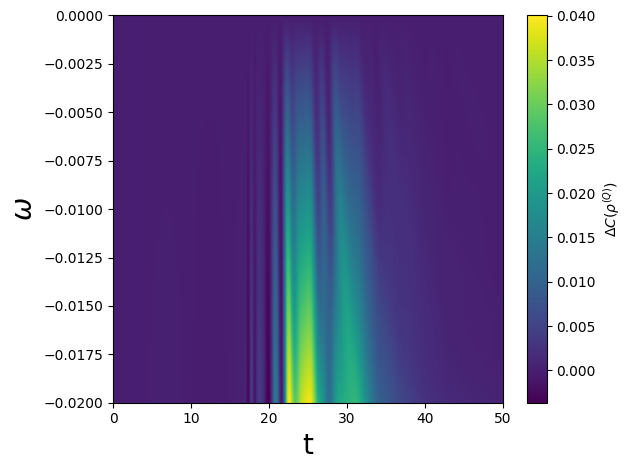

In [83]:
plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt
)

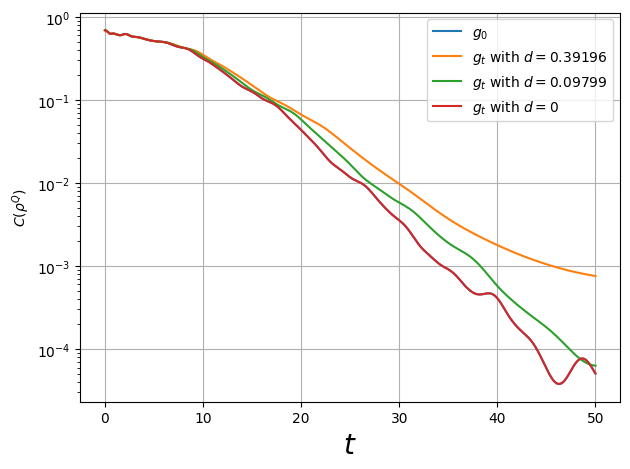

In [84]:
plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices
)


## 2.3 Caso Intermediário
Aqui, vamos verifical tal comportamento fazendo $\phi=0.5$ e $-\frac{1}{2T} < \omega < \frac{1}{2T}$.

### 2.3.1 - $T$ grande
$T=150$

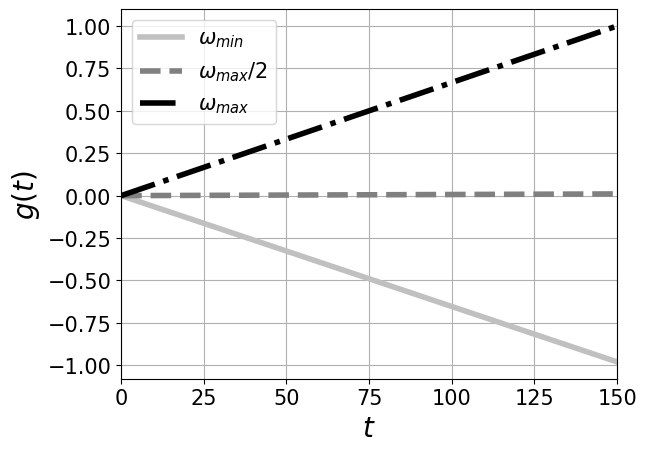

In [85]:
w_list, C_wt, D_wt, const, t = load_coerece('linear3')

lw_list = ['-', '--', '-.']
c_list = ['silver', 'gray','black']
indices = [1, len(w_list)//2, -1]

w_label = ['$\omega_{min}$','$\omega_{max}$/2','$\omega_{max}$']

for i, idx in enumerate(indices):
    g = w_list[idx]*t + 0
    plt.plot(t, g, lw=4, ls=lw_list[i], color=c_list[i], label=w_label[i])

plt.legend(fontsize=15)
plt.ylabel('$g(t)$', fontsize=20)
plt.xlabel('$t$', fontsize=20)
#plt.yscale('log')
plt.yticks(fontsize=15)
plt.xticks([0, 25, 50, 75, 100, 125, 150], fontsize=15)
plt.xlim(0, 150)
plt.grid(True)
plt.show()

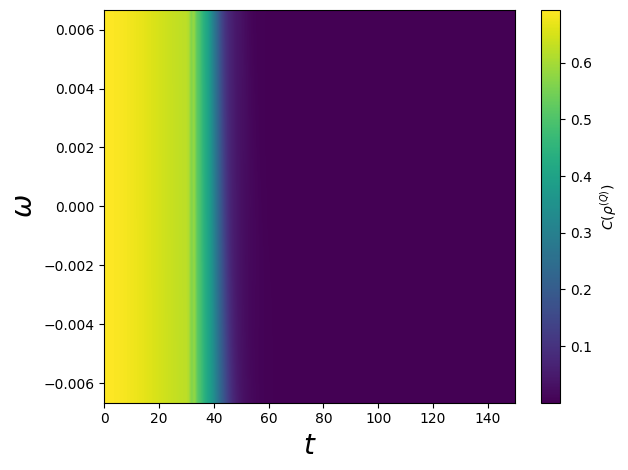

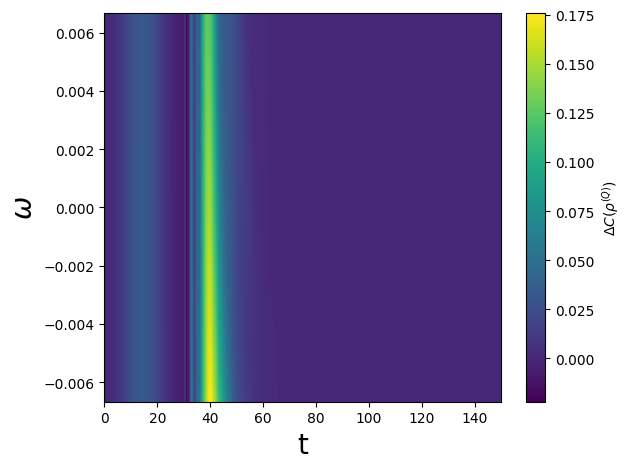

In [86]:
plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt
)

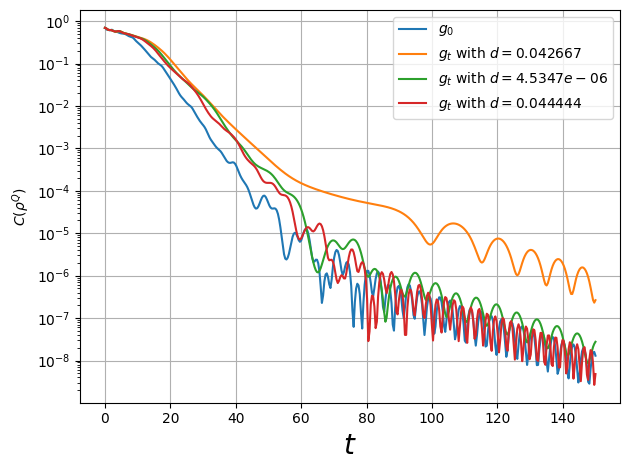

In [87]:
plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices
)


### 2.3.2 - $T$ pequeno
$T=50$

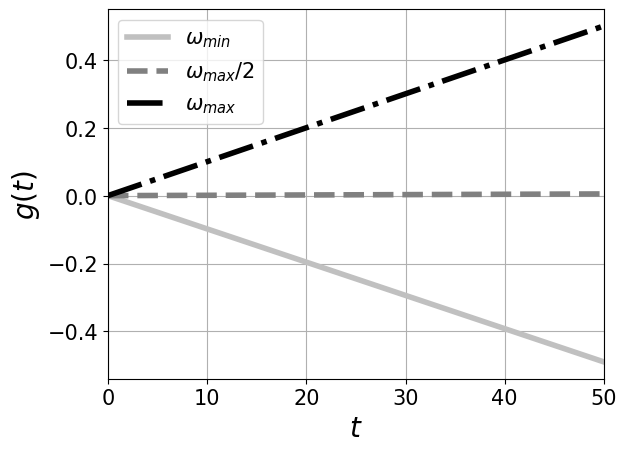

In [88]:
w_list, C_wt, D_wt, const, t = load_coerece('linear6')

lw_list = ['-', '--', '-.']
c_list = ['silver', 'gray','black']
indices = [1, len(w_list)//2, -1]

w_label = ['$\omega_{min}$','$\omega_{max}$/2','$\omega_{max}$']

for i, idx in enumerate(indices):
    g = w_list[idx]*t + 0
    plt.plot(t, g, lw=4, ls=lw_list[i], color=c_list[i], label=w_label[i])

plt.legend(fontsize=15)
plt.ylabel('$g(t)$', fontsize=20)
plt.xlabel('$t$', fontsize=20)
#plt.yscale('log')
plt.yticks(fontsize=15)
plt.xticks([0, 10, 20, 30 ,40 ,50], fontsize=15)
plt.xlim(0, 50)
plt.grid(True)
plt.show()

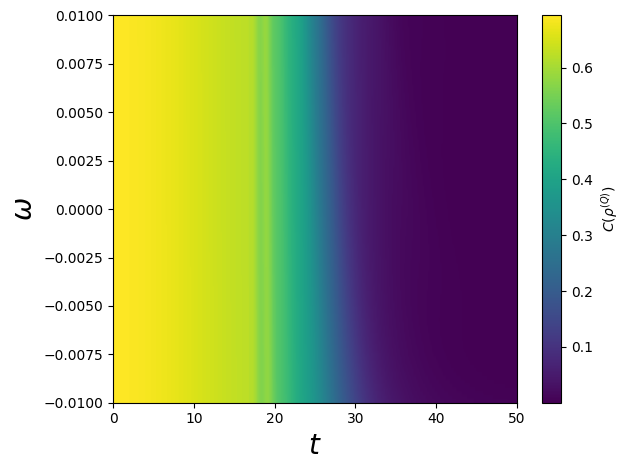

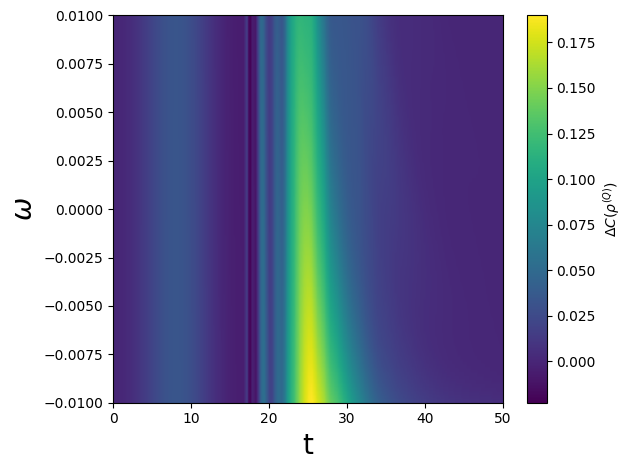

In [89]:
w_list, C_wt, D_wt, const, t = load_coerece('linear6')

plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt
)

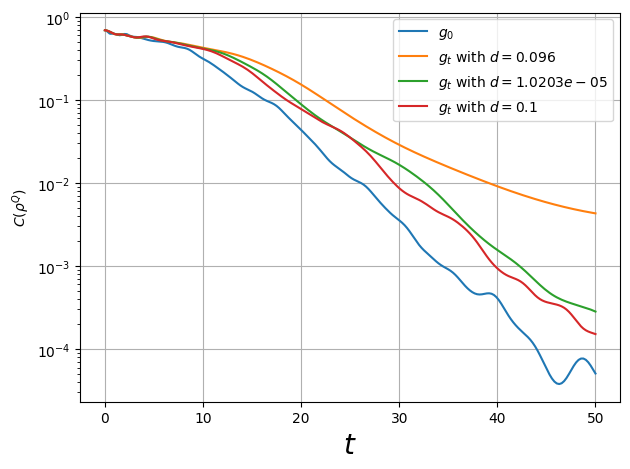

In [90]:
plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices
)


# 3. Gaussiana
Vamos considerar a modulação do tipo gaussiana,

\begin{equation}
    g(t) = g_0 \exp\left[\frac{\sigma(t-T)^2}{\zeta^2}\right],
\end{equation}
mas modificando os tais parâmetros para compreender diferentes cenários físicos.

## 3.1 Pico no meio e variando a espessura do pico
Aqui, vamos verifical tal comportamento fazendo $\sigma=-1$, $T=20$ e $6 < \zeta < 10$.

C:\Users\cesar\AppData\Local\Temp\ipykernel_20528\2085431654.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=15)


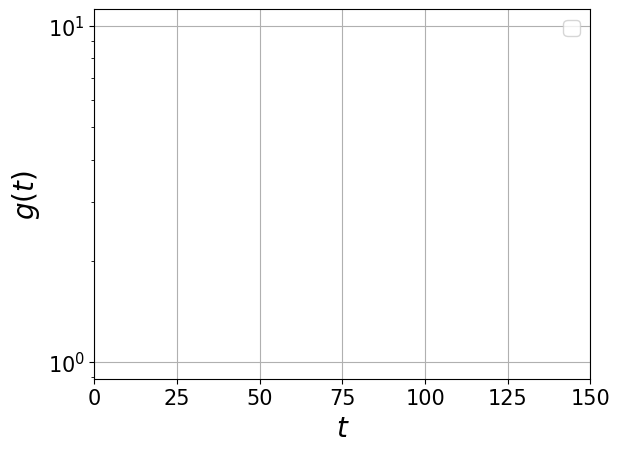

In [91]:
w_list, C_wt, D_wt, const, t = load_coerece('gauss1')

lw_list = ['-', '--', '-.']
c_list = ['silver', 'gray','black']
indices = [1, len(w_list)//2, -1]

w_label = ['$\omega_{min}$','$\omega_{max}$/2','$\omega_{max}$']
# NÃO ESTÁ FINALIZADO
#for i, idx in enumerate(indices):
#    g = np.exp(-w_list[idx]*(t-20)**2/)
#    plt.plot(t, g, lw=4, ls=lw_list[i], color=c_list[i], label=w_label[i])


plt.legend(fontsize=15)
plt.ylabel('$g(t)$', fontsize=20)
plt.xlabel('$t$', fontsize=20)
plt.yscale('log')
plt.yticks(fontsize=15)
plt.xticks([0, 25, 50, 75, 100, 125, 150], fontsize=15)
plt.xlim(0, 150)
plt.grid(True)
plt.show()

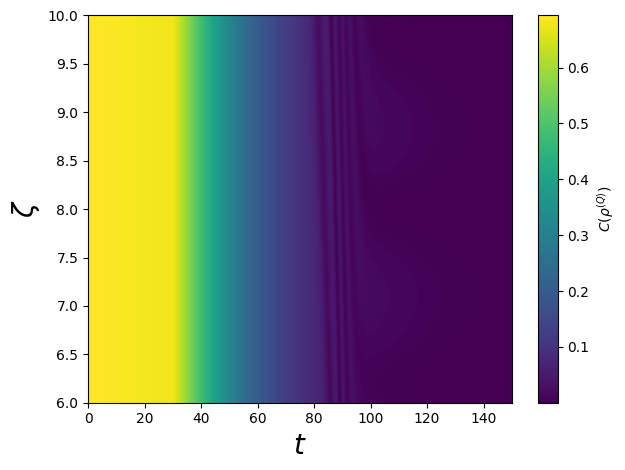

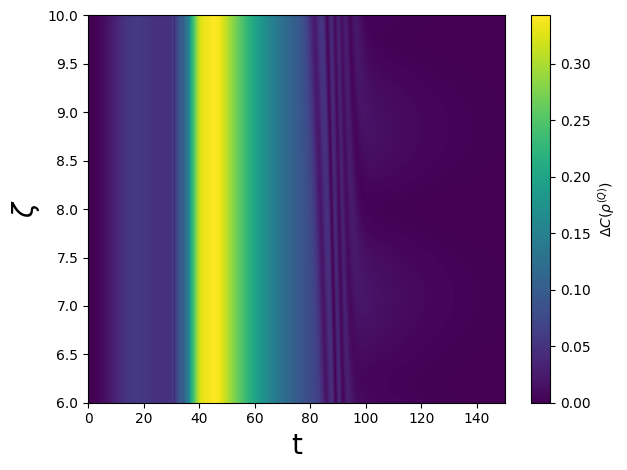

In [92]:
w_list, C_wt, D_wt, const, t = load_coerece('gauss1')

plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt,
    experiment='gauss1'
)

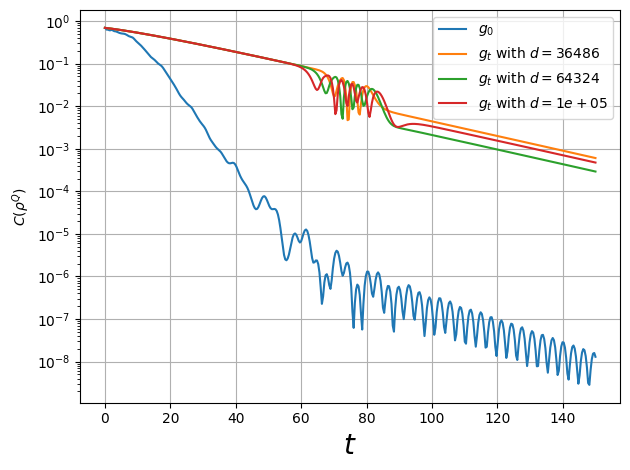

In [93]:
plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices,
)


## gauss4

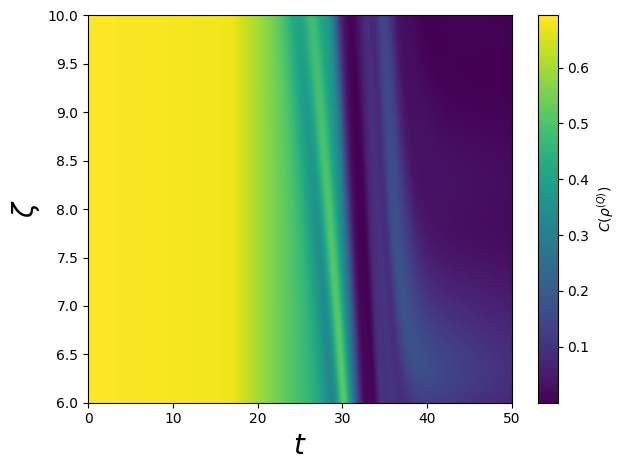

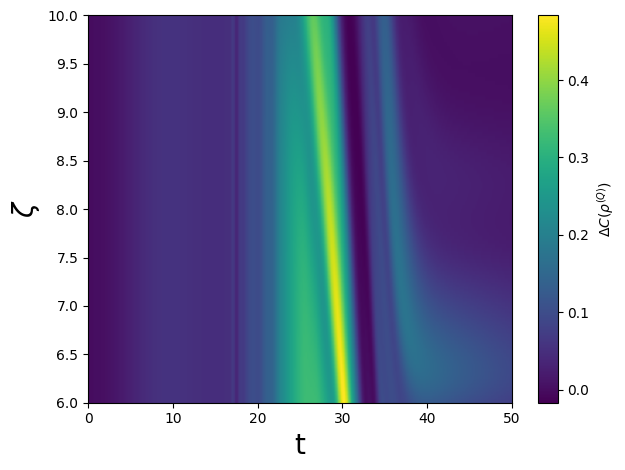

In [94]:
w_list, C_wt, D_wt, const, t = load_coerece('gauss4')

plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt,
    experiment='gauss1'
)

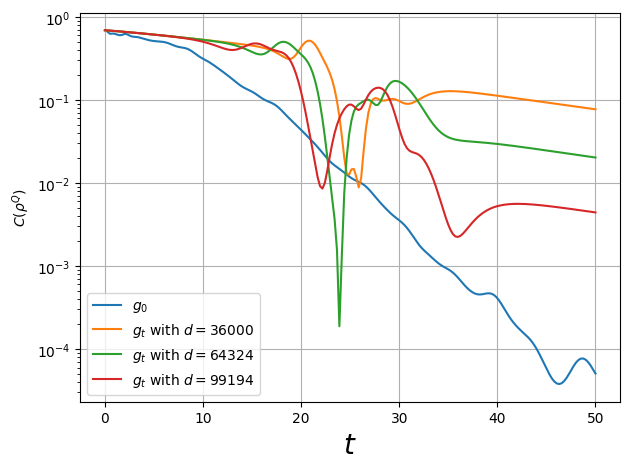

In [95]:
# Aqui não sei como ver essa variação, então só vou plotar primeiro, meio e ultimo. ignore o d no gráfico
indices = [0, len(w_list)//2, -2]

plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices,
)


## gauss2

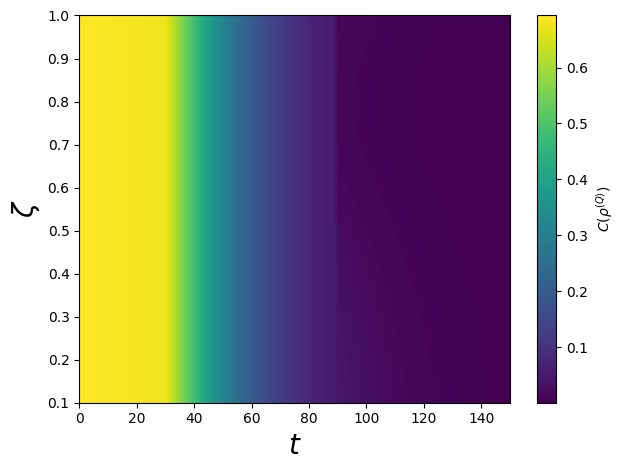

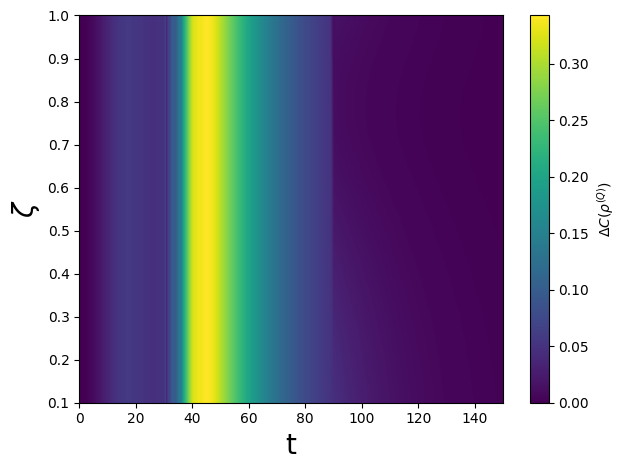

In [96]:
w_list, C_wt, D_wt, const, t = load_coerece('gauss2')

plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt,
    experiment='gauss2'
)

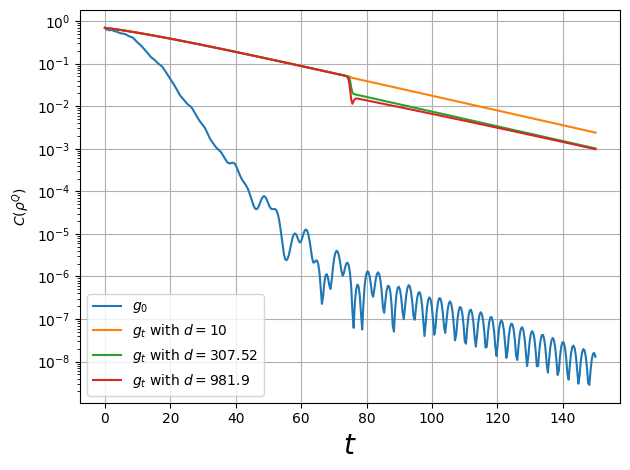

In [97]:
# Aqui não sei como ver essa variação, então só vou plotar primeiro, meio e ultimo. ignore o d no gráfico
indices = [0, len(w_list)//2, -2]

plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices,
    
)


## gauss5

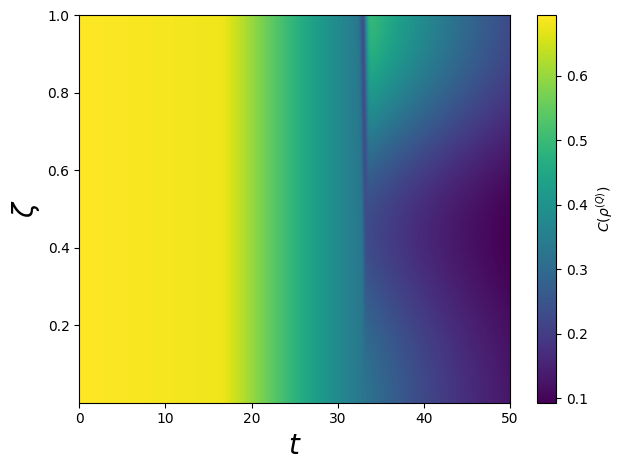

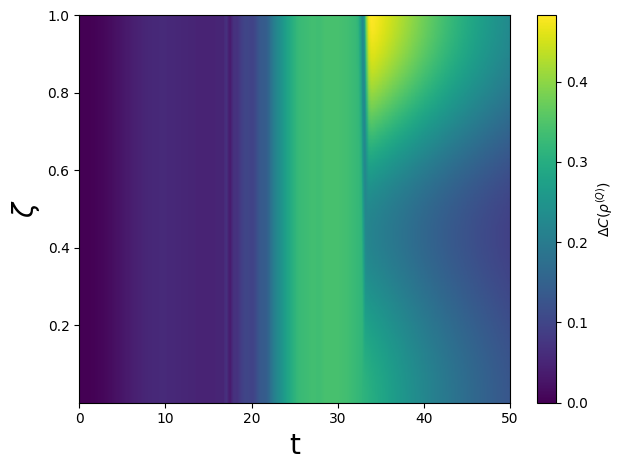

In [98]:
w_list, C_wt, D_wt, const, t = load_coerece('gauss5')

plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt,
    experiment='gauss2'
)

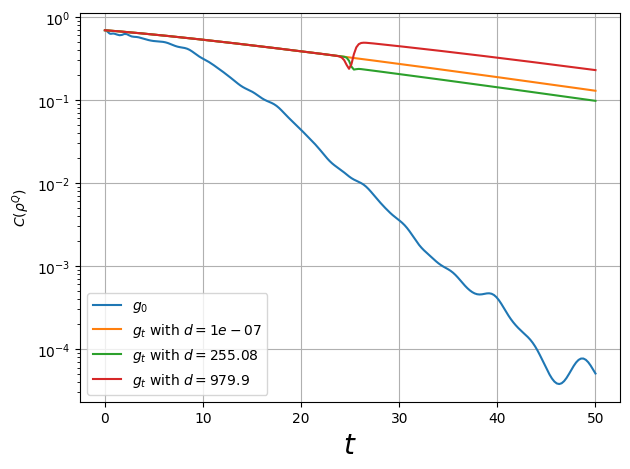

In [99]:
# Aqui não sei como ver essa variação, então só vou plotar primeiro, meio e ultimo. ignore o d no gráfico
indices = [0, len(w_list)//2, -2]

plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices,
    
)


## gauss3

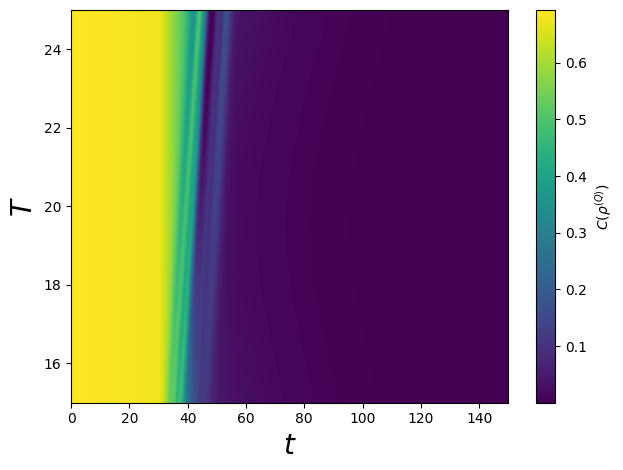

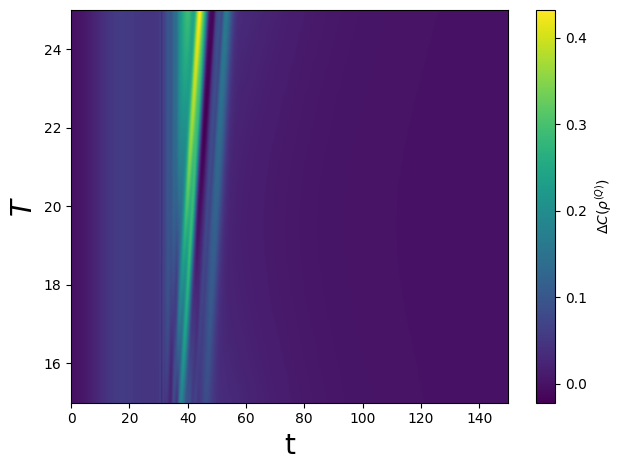

In [100]:
w_list, C_wt, D_wt, const, t = load_coerece('gauss3')

plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt,
    experiment='gauss3'
)

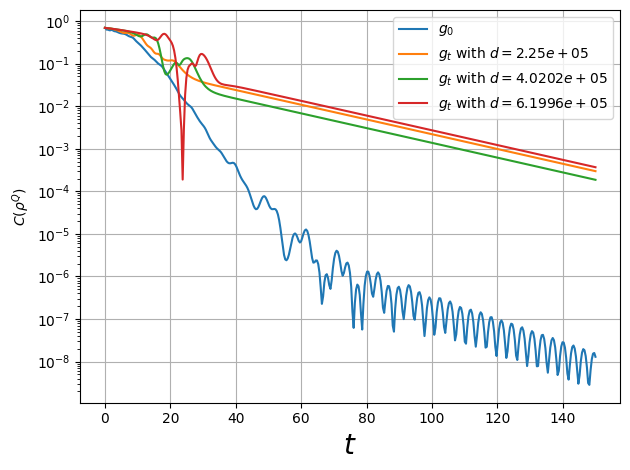

In [101]:
# Aqui não sei como ver essa variação, então só vou plotar primeiro, meio e ultimo. ignore o d no gráfico
indices = [0, len(w_list)//2, -2]

plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices,
    
)


## gauss6

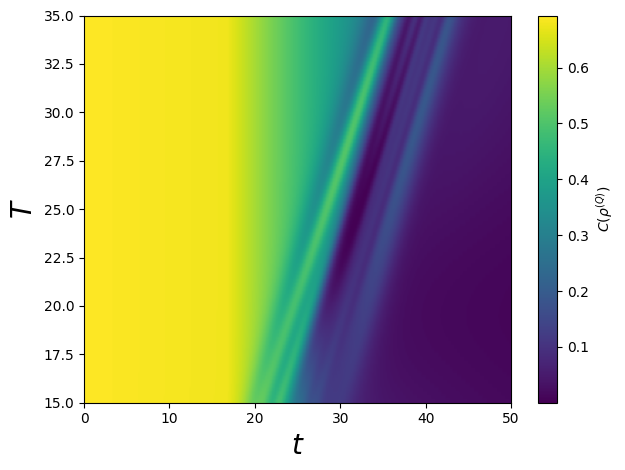

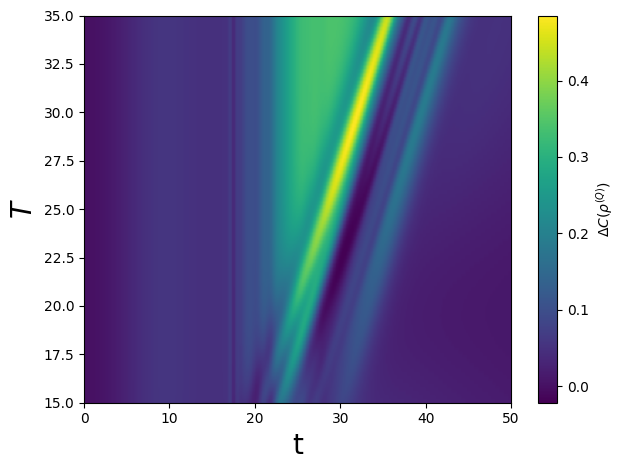

In [102]:
w_list, C_wt, D_wt, const, t = load_coerece('gauss6')

plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt,
    experiment='gauss6'
)

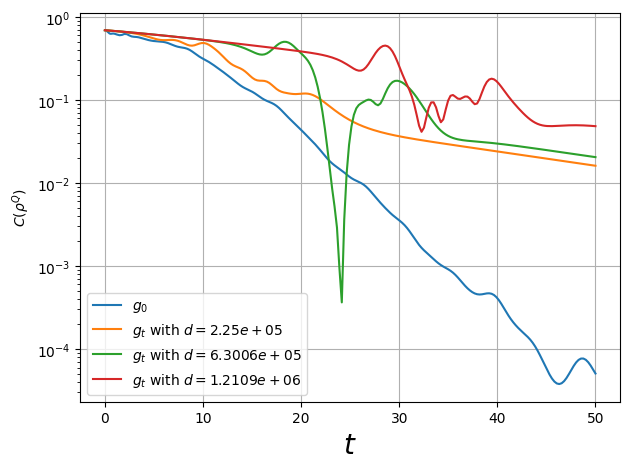

In [103]:
# Aqui não sei como ver essa variação, então só vou plotar primeiro, meio e ultimo. ignore o d no gráfico
indices = [0, len(w_list)//2, -2]

plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices,
    
)
